# Technical noise and artefacts

## Single cell quality control

Need to simultaneously pick the samples you'll use and the genes you'll use. But the relative quality of the cells also depends on which genes you use to assess that quality, so what's a biologist to do??


![](figures/kolodziejczyk2015_fig2A_quality_control.png)
Kolodziejczyk et al, Mol Cell (2015)


### Samples first

Most of the time, the bad cells will be obvious with any metric you use. Here are some examples of metrics you can use for each cell:

- Number of cells
    - Should be one!
    - Can observe this from visual inspection of the microfluidic chip or droplet
- GC content of library 
    - Should be similar to generic transcriptome
- Numbers of reads mapped
    - Should be in your defined range. For some experiments that's <50,000 reads, for others, that's <1 million reads.
- Percentage of reads mapped
    - Usually at least 80% mapping to the genome
- Proportion of reads mapped to mitochondria vs genome 
    - High mt/genome ratio suggests apoptotic cell
- Proportion of reads mapped to spike-ins vs genome
    - High spike-in/genome ratio suggests low mRNA content of cell (which may be biologically true or a technical artefact - you decide)
- Proportion of reads mapped to mitochondria vs genome
    - High mitochondrial/genome ratio suggests the cell was apoptosing as it was captured
    


In [12]:
import pandas as pd

macaulay2016 = pd.read_csv('../4._Case_Study/supplementary-data-1-sample-info/original_experiment_sample_info.csv', 
                              index_col=0)
macaulay2016.head()

,% Parent,% Total,3'UTR_Exons,488,5'UTR_Exons,561,Average mapped length,CDS_Exons,Cells,ERCC Content,...,molecule_r2,outlier_component,total_molecules,within_large_component,within_small_component,cluster_color,tsne_0,tsne_1,log_488,log_SSC
Well,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,NaN,100.00%,615178,80.0,118167,6.0,229.53,1273306,1.0,116339.14620,...,0.849279,-0.119395,2884413.0,0.070390,-0.104144,"(0.55432528607985565, 0.62711267120697922, 0.7...",-0.357368,12.650468,1.903090,1.995635
DIM_1_A10,NaN,100.00%,625664,39.0,99645,1.0,230.31,1032911,1.0,279412.04190,...,0.853730,0.017293,794642.0,0.073285,0.020246,"(0.90311419262605563, 0.54185316071790801, 0.7...",-0.001426,6.763604,1.591065,1.579784
DIM_1_A11,NaN,100.00%,733798,53.0,245374,1.0,230.64,3031565,1.0,24324.44224,...,0.778746,-0.036702,9513110.0,-0.016871,-0.179175,"(0.55432528607985565, 0.62711267120697922, 0.7...",-8.698019,8.706809,1.724276,2.206826
DIM_1_A12,NaN,100.00%,827658,337.0,148061,9.0,230.22,1597099,1.0,186802.23200,...,0.901161,0.034679,1243023.0,0.045065,-0.065027,"(0.55432528607985565, 0.62711267120697922, 0.7...",-4.495216,11.184408,2.527630,2.068186
DIM_1_A2,NaN,100.00%,187244,83.0,38552,5.0,229.60,322876,1.0,251667.90200,...,0.817718,0.072677,902531.0,0.074522,0.049654,"(0.90311419262605563, 0.54185316071790801, 0.7...",-1.362267,3.037966,1.919078,1.892095


In [13]:
import seaborn as sns
sns.set(context='notebook', style='white')
%matplotlib inline

import matplotlib.pyplot as plt

import ipywidgets

In [14]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

import rpy2.robjects as robjects
import pandas.rpy.common as com
print(robjects.r.load("/Users/olga/workspace-git/HSMMSingleCell/data/HSMM_sample_sheet.rda"))

trapnell2014 = com.load_data('HSMM_sample_sheet')
trapnell2014.head()

[1] "HSMM_sample_sheet"



,Library,Well,Hours,Media,Mapped.Fragments,Pseudotime,State
T0_CT_A01,SCC10013_A01,A01,0,GM,1958074,23.916673,1
T0_CT_A03,SCC10013_A03,A03,0,GM,1930722,9.022265,1
T0_CT_A05,SCC10013_A05,A05,0,GM,1452623,7.546608,1
T0_CT_A06,SCC10013_A06,A06,0,GM,2566325,21.463948,1
T0_CT_A07,SCC10013_A07,A07,0,GM,2383438,11.299806,1


In [ ]:
robjects.r

In [27]:
robjects.r.load('scRNASeqMouseJaitinSpleen')

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in readChar(con, 5L, useBytes = TRUE) : cannot open the connection

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: Warning messages:

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: 1: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning

RRuntimeError: Error in readChar(con, 5L, useBytes = TRUE) : cannot open the connection


In [15]:
mkdir data

mkdir: data: File exists


In [16]:
trapnell2014.to_csv('data/trapnell2014_metadata.csv')

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


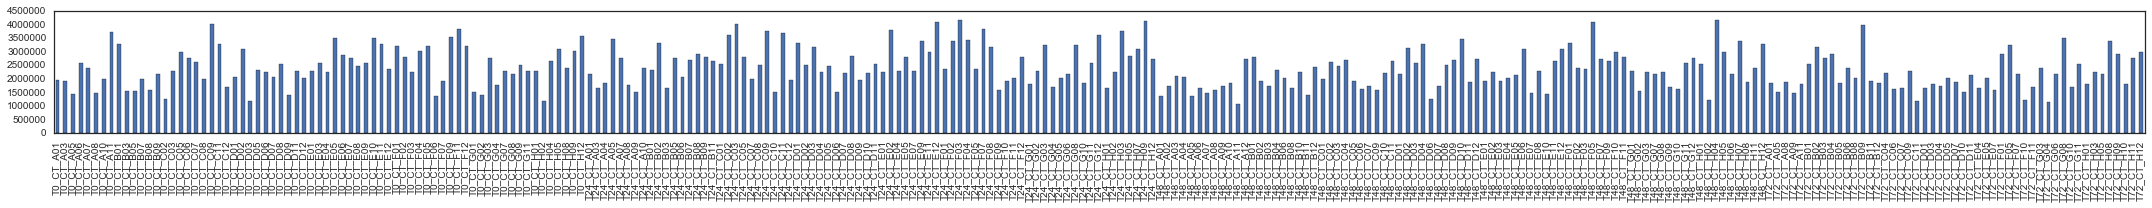

In [17]:
fig, ax = plt.subplots(figsize=(30, 3))
trapnell2014['Mapped.Fragments'].plot(kind='bar')

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


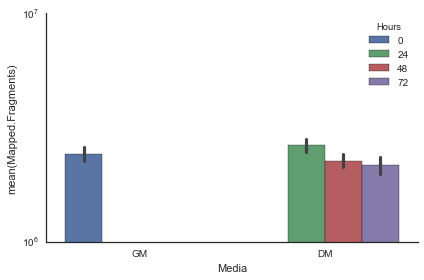

In [19]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.barplot(y='Mapped.Fragments', x='Media', hue='Hours', data=trapnell2014, ax=ax)
sns.despine()

In [20]:
import pandas as pd

In [26]:
shalek2014 = pd.read_excel('/Users/olga/Downloads/nature13437-s3.xls')
shalek2014.head()

,Experiment,Total Reads,Aligned Reads % (Transcriptome)
0,On_Chip_Stimulation_LPS_4h_S10_rsem,1528837.0,31.59
1,On_Chip_Stimulation_LPS_4h_S11_rsem,1519096.0,36.06
2,On_Chip_Stimulation_LPS_4h_S13_rsem,2866167.0,43.32
3,On_Chip_Stimulation_LPS_4h_S16_rsem,2096589.0,33.16
4,On_Chip_Stimulation_LPS_4h_S17_rsem,1427777.0,25.52


In [ ]:
pd.Series.str.extract

In [39]:
shalek2014['Group'] = shalek2014['Experiment'].str.extract('(\w+)_S\d+_rsem')
shalek2014.head()

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,Experiment,Total Reads,Aligned Reads % (Transcriptome),Group
0,On_Chip_Stimulation_LPS_4h_S10_rsem,1528837.0,31.59,On_Chip_Stimulation_LPS_4h
1,On_Chip_Stimulation_LPS_4h_S11_rsem,1519096.0,36.06,On_Chip_Stimulation_LPS_4h
2,On_Chip_Stimulation_LPS_4h_S13_rsem,2866167.0,43.32,On_Chip_Stimulation_LPS_4h
3,On_Chip_Stimulation_LPS_4h_S16_rsem,2096589.0,33.16,On_Chip_Stimulation_LPS_4h
4,On_Chip_Stimulation_LPS_4h_S17_rsem,1427777.0,25.52,On_Chip_Stimulation_LPS_4h


/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


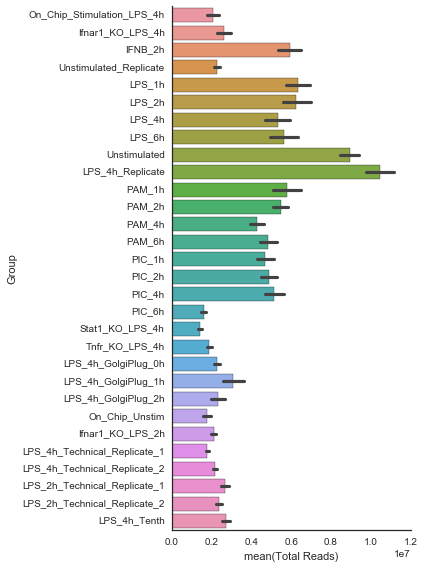

In [47]:
fig, ax = plt.subplots(figsize=(6, 8))
# ax.set_yscale('log') 
sns.barplot(x='Total Reads', y='Group', data=shalek2014, ax=ax, orient='h')
sns.despine()

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


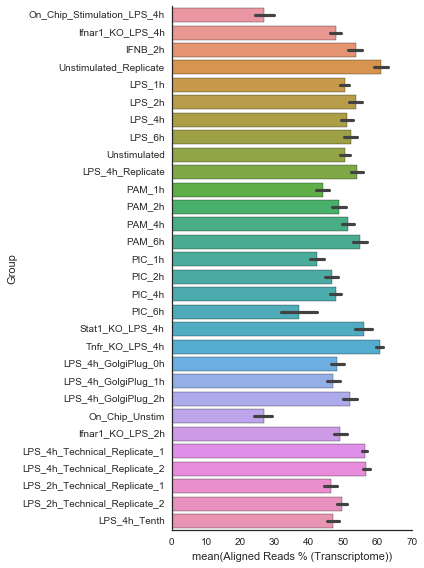

In [46]:
fig, ax = plt.subplots(figsize=(6, 8))
# ax.set_yscale('log') 
sns.barplot(x='Aligned Reads % (Transcriptome)', y='Group', data=shalek2014, ax=ax, orient='h')
sns.despine()

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


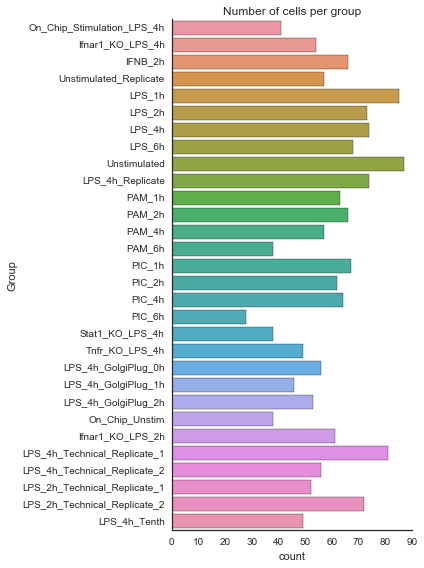

In [49]:
fig, ax = plt.subplots(figsize=(6, 8))
# ax.set_yscale('log') 
sns.countplot(y='Group', data=shalek2014, ax=ax, orient='h')
sns.despine()
ax.set_title("Number of cells per group")

In [ ]:
qc_columns = ['MT Content', 'ERCC Content', 'detected_genes', 'total_molecules']


macaulay2016.loc['apoptosing_cell', qc_columns] = 200000, 5000, 2000, 
macaulay2016.loc['low_mrna_content', qc_columns] = 1500, 800000, 2000,
macaulay2016.loc['too_few_genes', qc_columns] = 1500, 5000, 500, 
macaulay2016.loc['too_few_molecules', qc_columns] = 1500, 5000, 500, 

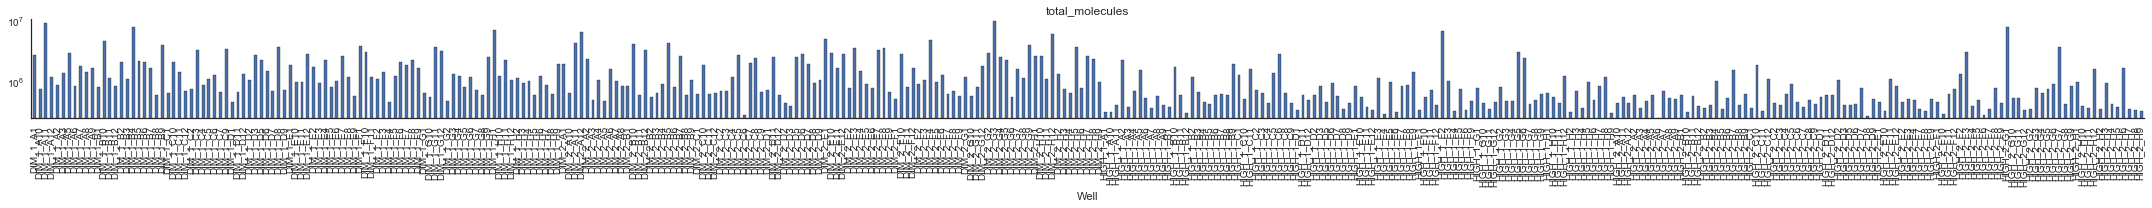

In [50]:
def explore_quality_control(x, y, logy):
    x = x.lower()
    if x == 'batch':
        fig, axes = plt.subplots(figsize=(8, 3), ncols=2)
        ax = axes[0]
        if logy:
            ax.set_yscale('log')
        sns.boxplot(y=y, x=x, data=macaulay2016, ax=ax, palette='Paired')
        ax.set(title=y)
        
        ax = axes[1]
        sns.countplot(x, data=macaulay2016)
        ax.set(ylabel="Number of cells", title='Cells per batch')
    else:
        fig, ax = plt.subplots(figsize=(30, 3))
        macaulay2016[y].plot(kind='bar', logy=logy, ax=ax)
        ax.set(ylim=(0, macaulay2016[y].max()*1.05), title=y)
        
    sns.despine()
    fig.tight_layout()

ipywidgets.interact(explore_quality_control,
                    x=ipywidgets.Dropdown(value='Cells', options=['Cells', 'Batch'], description='x-axis'),
                    y=ipywidgets.Dropdown(value='MT Content', options=['MT Content', 'ERCC Content', 
                                                                       'detected_genes', 'total_molecules'],
                                          description='y-axis'),
                    logy=ipywidgets.Checkbox(value=False, description='Set the y-axis as log10-scale?'));

## Normalization

## Dealing with zeros



In [51]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

import rpy2.robjects as robjects
import pandas.rpy.common as com
print(robjects.r.load("/Users/olga/workspace-git/HSMMSingleCell/data/HSMM_expr_matrix.rda"))

trapnell2014_expression = com.load_data('HSMM_expr_matrix')
trapnell2014_expression.head()

[1] "HSMM_expr_matrix"



,T0_CT_A01,T0_CT_A03,T0_CT_A05,T0_CT_A06,T0_CT_A07,T0_CT_A08,T0_CT_A10,T0_CT_A11,T0_CT_B01,T0_CT_B03,...,T72_CT_G10,T72_CT_G11,T72_CT_H01,T72_CT_H03,T72_CT_H05,T72_CT_H08,T72_CT_H09,T72_CT_H10,T72_CT_H11,T72_CT_H12
ENSG00000000003.10,21.984400,1.280040,43.46180,0.00000,39.80760,4.63181,18.831000,0.0477,42.750500,23.2129,...,0.000000,1.08239,1.18123,2.12809,29.05720,3.37560,10.0780,6.61765,5.84364,38.2474
ENSG00000000005.5,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.0000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000
ENSG00000000419.8,40.059700,77.580800,6.49656,4.90934,1.15652,35.58380,0.907017,0.0000,10.808200,38.0942,...,20.304600,0.00000,43.54700,27.19050,8.77107,86.16450,58.4063,103.37200,14.37330,15.9862
ENSG00000000457.8,0.937081,0.729195,0.00000,0.00000,0.00000,0.00000,0.578949,0.0000,0.000000,0.0000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000
ENSG00000000460.12,0.740922,57.578500,3.93587,0.00000,0.00000,1.75868,0.000000,0.0000,0.762205,13.3956,...,0.135884,0.00000,0.00000,0.00000,9.39190,8.88109,0.0000,0.00000,0.00000,0.0000


In [70]:
trapnell2014_expression.tail()

,T0_CT_A01,T0_CT_A03,T0_CT_A05,T0_CT_A06,T0_CT_A07,T0_CT_A08,T0_CT_A10,T0_CT_A11,T0_CT_B01,T0_CT_B03,...,T72_CT_G10,T72_CT_G11,T72_CT_H01,T72_CT_H03,T72_CT_H05,T72_CT_H08,T72_CT_H09,T72_CT_H10,T72_CT_H11,T72_CT_H12
ENSGR0000237531.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSGR0000237801.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSGR0000248421.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSGR0000249358.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSGR0000270726.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
macaulay2016_expression = np.log10(pd.read_csv('../4._Case_Study/macaulay2016/gene_expression_s.csv', index_col=0)+1)
macaulay2016_expression.head()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.000000,0.000000,0.592149,0.0,0.000000,0.0,0.0,2.036273,0.0,0.0,...,0.0,0.371572,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
ENSDARG00000000002,0.679401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.655281,0.0,0.000000
ENSDARG00000000018,0.000000,1.516867,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.001289,1.36034,2.181481,1.804201,2.095152,0.0,0.000000
ENSDARG00000000019,0.000000,0.000000,0.000000,0.0,1.808764,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.674375,0.00000,0.000000,0.000000,0.000000,0.0,2.511579
ENSDARG00000000068,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,1.793946,0.000000,0.0,0.000000


In [89]:
ercc_names = [x for x in macaulay2016_expression.index if 'ERCC' in x]

In [90]:
ercc = macaulay2016_expression.loc[ercc_names]

In [91]:
macaulay2016_expression_genes = macaulay2016_expression.loc[macaulay2016_expression.index.difference(ercc_names)]

In [111]:
macaulay2016_expression_genes.shape

(26724, 384)

In [112]:
macaulay2016_expression_genes_T = macaulay2016_expression_genes.T

In [92]:
macaulay2016_expression_genes.head()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.000000,0.000000,0.592149,0.0,0.000000,0.0,0.0,2.036273,0.0,0.0,...,0.0,0.371572,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
ENSDARG00000000002,0.679401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.655281,0.0,0.000000
ENSDARG00000000018,0.000000,1.516867,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.001289,1.36034,2.181481,1.804201,2.095152,0.0,0.000000
ENSDARG00000000019,0.000000,0.000000,0.000000,0.0,1.808764,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.674375,0.00000,0.000000,0.000000,0.000000,0.0,2.511579
ENSDARG00000000068,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,1.793946,0.000000,0.0,0.000000


In [93]:
import numpy as np

In [94]:
expression = macaulay2016_expression_genes

In [95]:
mean_expression = macaulay2016_expression_genes_T.mean()
std_expression = macaulay2016_expression_genes_T.std()

In [113]:
(macaulay2016_expression_genes_T > 0).sum()

0
ENSDARG00000000001     26
ENSDARG00000000002      7
ENSDARG00000000018    102
ENSDARG00000000019     93
ENSDARG00000000068     16
ENSDARG00000000069    126
ENSDARG00000000086    109
ENSDARG00000000102     13
ENSDARG00000000103     88
ENSDARG00000000142     21
ENSDARG00000000151     23
ENSDARG00000000161      6
ENSDARG00000000175      3
ENSDARG00000000183     10
ENSDARG00000000189     17
ENSDARG00000000212      3
ENSDARG00000000229      9
ENSDARG00000000241     25
ENSDARG00000000324     33
ENSDARG00000000349      1
ENSDARG00000000369      1
ENSDARG00000000370     12
ENSDARG00000000380      3
ENSDARG00000000384     25
ENSDARG00000000394    103
ENSDARG00000000423     20
ENSDARG00000000442      7
ENSDARG00000000460      5
ENSDARG00000000472      5
ENSDARG00000000474      1
                     ... 
ENSDARG00000097952      7
ENSDARG00000097954      0
ENSDARG00000097959      1
ENSDARG00000097961      4
ENSDARG00000097964      4
ENSDARG00000097975     12
ENSDARG00000097979      5
ENSDARG000

In [96]:
mean_ercc = ercc.T.mean()
std_ercc = ercc.T.std()

In [102]:
coefficient_of_variation_expression = np.square(std_expression/mean_expression)
cv_ercc = np.square(std_ercc/mean_ercc)

In [107]:
np.log(10)/np.log(2)

3.3219280948873626

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


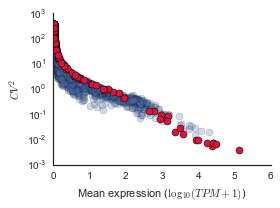

In [110]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.semilogy(mean_expression, coefficient_of_variation_expression, 'o', alpha=0.25, markeredgewidth=0.5)
ax.semilogy(mean_ercc, cv_ercc, 'o', color='Crimson', markeredgewidth=0.5) 
ax.set(xlabel='Mean expression ($\log_{10}(TPM+1)$)', ylabel='$CV^2$')
sns.despine()

In [115]:
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE

In [116]:
expression.head()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.000000,0.000000,0.592149,0.0,0.000000,0.0,0.0,2.036273,0.0,0.0,...,0.0,0.371572,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
ENSDARG00000000002,0.679401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.655281,0.0,0.000000
ENSDARG00000000018,0.000000,1.516867,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.001289,1.36034,2.181481,1.804201,2.095152,0.0,0.000000
ENSDARG00000000019,0.000000,0.000000,0.000000,0.0,1.808764,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.674375,0.00000,0.000000,0.000000,0.000000,0.0,2.511579
ENSDARG00000000068,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,1.793946,0.000000,0.0,0.000000


In [192]:
genes = macaulay2016_expression

ercc_idx = filter(lambda i: 'ERCC' in i, macaulay2016_expression.index)
egenes = genes.drop(ercc_idx)
egenes = egenes.drop('GFP')

egenes = (egenes / egenes.sum()) * 1e6

mask = (egenes > 1).sum(1) > 2
egenes = egenes.ix[mask]
original_expression_data = np.log10(egenes.T + 1).copy()


In [123]:
genes_detected_per_cell = (macaulay2016_expression_genes > 0).sum()
cells_detected_per_gene = (macaulay2016_expression_genes_T > 0).sum()

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


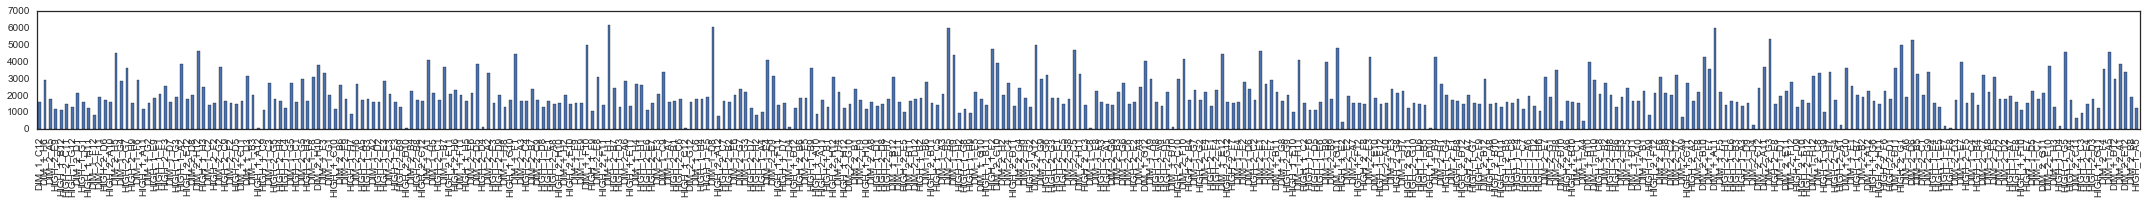

In [172]:
fig, ax = plt.subplots(figsize=(30, 3))
genes_detected_per_cell.plot(kind='bar')

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


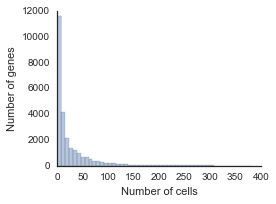

In [174]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.distplot(cells_detected_per_gene, kde=False)
ax.set(xlim=(0, 400), xlabel='Number of cells', ylabel='Number of genes')
sns.despine()

In [124]:
genes_detected_per_cell['DIM_1_F12']

824

In [138]:
import matplotlib as mpl

In [184]:
%pdb

Automatic pdb calling has been turned ON


In [186]:
cell_color = macaulay2016.loc[expression.columns, 'cluster_color'].map(
    lambda x: eval(x) if isinstance(x, str) else x)
cell_color = cell_color.replace('nan', np.nan)
cell_color.head()

DIM_1_C12     (0.9031141926260556, 0.541853160717908, 0.7649...
DIM_1_H6      (0.5543252860798557, 0.6271126712069792, 0.795...
DIM_2_A5      (0.6537178214858562, 0.8470895900445826, 0.328...
HIGH_2_E9     (0.6537178214858562, 0.8470895900445826, 0.328...
HIGH_1_B12    (0.6537178214858562, 0.8470895900445826, 0.328...
Name: cluster_color, dtype: object

In [177]:
cell_color.values.shape

(384,)

In [178]:
np.array(cell_color.values).shape

(384,)

In [179]:
decomposed.shape

(363, 4)

In [180]:
decomposed

array([[-0.04847697, -0.00173413,  0.01822587, -0.02628838],
       [ 0.10269672, -0.02140099,  0.11553921, -0.01875994],
       [-0.01082733, -0.00962197, -0.00309617,  0.03471913],
       ..., 
       [ 0.11373559, -0.10210957, -0.04135164, -0.04500783],
       [-0.04879089, -0.01883438,  0.00392518, -0.04380915],
       [-0.01854277, -0.01511132,  0.00177625,  0.03384953]])

In [190]:
macaulay2016_expression.head()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.000000,0.000000,0.592149,0.0,0.000000,0.0,0.0,2.036273,0.0,0.0,...,0.0,0.371572,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
ENSDARG00000000002,0.679401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.655281,0.0,0.000000
ENSDARG00000000018,0.000000,1.516867,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.001289,1.36034,2.181481,1.804201,2.095152,0.0,0.000000
ENSDARG00000000019,0.000000,0.000000,0.000000,0.0,1.808764,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.674375,0.00000,0.000000,0.000000,0.000000,0.0,2.511579
ENSDARG00000000068,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,1.793946,0.000000,0.0,0.000000


In [ ]:
ica = decomposition.FastICA(n_components=4, random_state=3984)
decomposed = ica.fit_transform(macaulay2016_expression_genes.T)

embedder = TSNE(n_components=2, perplexity=75, random_state=254)
embedded = pd.DataFrame(embedder.fit_transform(decomposed))

ValueError: to_rgba: Invalid rgba arg "nan"
to_rgb: Invalid rgb arg "nan"
cannot convert argument to rgb sequence

> /Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/colors.py(376)to_rgba()
    374         except (TypeError, ValueError) as exc:
    375             raise ValueError(
--> 376                 'to_rgba: Invalid rgba arg "%s"\n%s' % (str(arg), exc))
    377 
    378     def to_rgba_array(self, c, alpha=None):

ipdb> q


/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


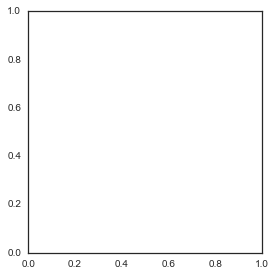

In [188]:
sns.set(style='white') 
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(embedded[0], embedded[1], c=cell_color, s=40)
# Empty the tick labels
ax.set(xticks=[], yticks=[])
sns.despine(bottom=True, left=True, ax=ax)
fig.tight_layout()

In [166]:
macaulay2016_expression.head()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.000000,0.000000,0.592149,0.0,0.000000,0.0,0.0,2.036273,0.0,0.0,...,0.0,0.371572,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
ENSDARG00000000002,0.679401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.655281,0.0,0.000000
ENSDARG00000000018,0.000000,1.516867,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.001289,1.36034,2.181481,1.804201,2.095152,0.0,0.000000
ENSDARG00000000019,0.000000,0.000000,0.000000,0.0,1.808764,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.674375,0.00000,0.000000,0.000000,0.000000,0.0,2.511579
ENSDARG00000000068,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,1.793946,0.000000,0.0,0.000000
